# Sign Language Data Analysis

This notebook analyzes the sign language data collected using MediaPipe, examining the structure of hand and pose landmarks stored in the .npy files.

In [3]:
import numpy as np
import os
from module.helper_functions import get_data_path

# Get path to data directory
data_path = get_data_path()
print(f"Data path: {data_path}")

# List available actions/signs
actions = [action for action in os.listdir(data_path) if not action.startswith('.')]
if actions:
    print(f"Available signs: {actions}")
    
    # Pick the first action
    action = actions[0]
    
    # Get sequences for this action
    sequences = [seq for seq in os.listdir(os.path.join(data_path, action)) if not seq.startswith('.')]
    if sequences:
        # Pick the first sequence
        sequence = sequences[0]
        
        # Get frames for this sequence
        frames = [f for f in os.listdir(os.path.join(data_path, action, sequence)) if f.endswith('.npy')]
        if frames:
            # Pick the first frame
            frame = frames[0]
            
            # Full path to the file
            file_path = os.path.join(data_path, action, sequence, frame)
            print(f"Opening file: {file_path}")
            
            # Load the data and show shape
            data = np.load(file_path)
            print(f"Data shape: {data.shape}")
            
            # Show more details about the data structure
            print(f"Data type: {data.dtype}")
            
            # Show first few values
            print(f"First 10 values: {data[:10]}")
            
            # If we expect specific structure (126 values - 63 for each hand)
            if len(data) >= 126:
                left_hand = data[:63]
                right_hand = data[63:126]
                print(f"Left hand data shape: {left_hand.shape}")
                print(f"Right hand data shape: {right_hand.shape}")
else:
    print("No sign data found in the data directory.")

Data path: /Users/mandev/Library/CloudStorage/OneDrive-man1605/Sign_Language/data
Available signs: ['hello', 'iloveyou']
Opening file: /Users/mandev/Library/CloudStorage/OneDrive-man1605/Sign_Language/data/hello/man_2/20.npy
Data shape: (225,)
Data type: float64
First 10 values: [ 0.37005419  0.36472562 -0.39289242  0.38955337  0.30527961 -0.35508579
  0.40082765  0.30277139 -0.35484043  0.41098109]
Left hand data shape: (63,)
Right hand data shape: (63,)


## MediaPipe Pose Data Analysis

MediaPipe's holistic model captures pose landmarks in addition to hand landmarks. Each .npy file contains:

1. Pose landmarks (first 33 points × 3 coordinates = 99 values)
2. Left hand landmarks (21 points × 3 coordinates = 63 values)
3. Right hand landmarks (21 points × 3 coordinates = 63 values)

Let's extract and analyze the pose landmarks from our data.

In [4]:
# Continue with the previously loaded data frame
if 'data' in locals() and len(data) >= 225:  # 33+63+63=159 (pose + left hand + right hand) minimum
    # Extract pose landmarks (first 33 landmarks, each with x,y,z)
    pose_landmarks = data[:99]  # 33 landmarks × 3 coordinates
    print(f"Pose landmarks shape: {pose_landmarks.shape}")
    
    # Check how many non-zero pose landmarks we have
    non_zero_pose = np.count_nonzero(pose_landmarks)
    print(f"Non-zero pose landmark values: {non_zero_pose} out of {pose_landmarks.size}")
    
    # Show first few pose landmarks
    print("\nFirst 5 pose landmarks (x,y,z):")
    for i in range(5):
        x, y, z = pose_landmarks[i*3], pose_landmarks[i*3+1], pose_landmarks[i*3+2]
        print(f"Landmark {i}: ({x:.4f}, {y:.4f}, {z:.4f})")
else:
    print("No data available or data doesn't contain pose landmarks")

Pose landmarks shape: (99,)
Non-zero pose landmark values: 99 out of 99

First 5 pose landmarks (x,y,z):
Landmark 0: (0.3701, 0.3647, -0.3929)
Landmark 1: (0.3896, 0.3053, -0.3551)
Landmark 2: (0.4008, 0.3028, -0.3548)
Landmark 3: (0.4110, 0.3019, -0.3544)
Landmark 4: (0.3554, 0.3172, -0.3542)


## Visualize Pose and Hand Landmarks

Let's create a simple visualization of the landmarks using matplotlib.

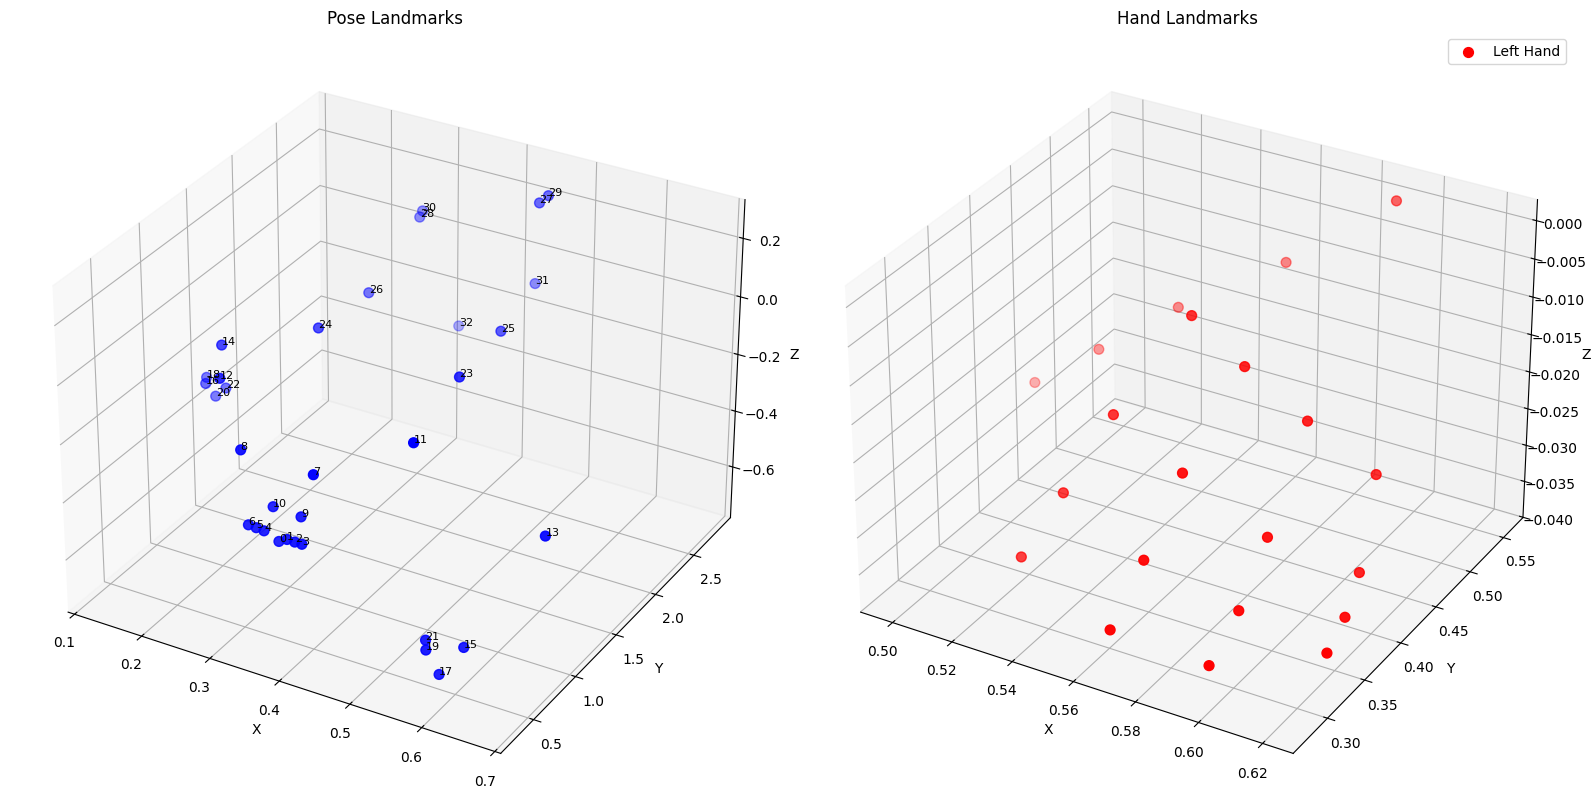

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Check if we have data to visualize
if 'data' in locals() and len(data) >= 225:
    # Create figure with 2 3D subplots
    fig = plt.figure(figsize=(16, 8))
    
    # Plot 1: Pose Landmarks
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Extract x, y, z coordinates for pose
    pose_x = pose_landmarks[0::3]  # every 3rd element starting from 0
    pose_y = pose_landmarks[1::3]  # every 3rd element starting from 1
    pose_z = pose_landmarks[2::3]  # every 3rd element starting from 2
    
    # Filter out zero values (missing landmarks)
    valid_indices = np.where(np.abs(pose_x) + np.abs(pose_y) + np.abs(pose_z) > 0)[0]
    
    if len(valid_indices) > 0:
        ax1.scatter(pose_x[valid_indices], pose_y[valid_indices], pose_z[valid_indices], 
                    c='blue', marker='o', s=50)
        
        # Add landmark indices as labels
        for i in valid_indices:
            ax1.text(pose_x[i], pose_y[i], pose_z[i], str(i), size=8)
            
    ax1.set_title('Pose Landmarks')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # Plot 2: Hand Landmarks
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Extract hand landmarks
    if len(data) >= 126:
        left_hand = data[99:162]  # 21 landmarks × 3 coordinates
        right_hand = data[162:225]  # 21 landmarks × 3 coordinates
        
        # Extract coordinates
        left_x = left_hand[0::3]
        left_y = left_hand[1::3]
        left_z = left_hand[2::3]
        
        right_x = right_hand[0::3]
        right_y = right_hand[1::3]
        right_z = right_hand[2::3]
        
        # Filter out zero values
        left_valid = np.where(np.abs(left_x) + np.abs(left_y) + np.abs(left_z) > 0)[0]
        right_valid = np.where(np.abs(right_x) + np.abs(right_y) + np.abs(right_z) > 0)[0]
        
        if len(left_valid) > 0:
            ax2.scatter(left_x[left_valid], left_y[left_valid], left_z[left_valid], 
                       c='red', marker='o', s=50, label='Left Hand')
            
        if len(right_valid) > 0:
            ax2.scatter(right_x[right_valid], right_y[right_valid], right_z[right_valid], 
                       c='green', marker='o', s=50, label='Right Hand')
            
        ax2.set_title('Hand Landmarks')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')
        ax2.legend()
        
    plt.tight_layout()
    plt.show()
else:
    print("No data available for visualization")

## Analyze Multiple Frames

Let's load multiple frames for the same sign and analyze how the pose changes over time.

In [6]:
# Function to extract pose landmarks from a frame
def extract_pose(frame_data):
    if len(frame_data) >= 99:  # Ensure we have pose data
        return frame_data[:99]  # First 33 landmarks with x,y,z coordinates
    return None

# Load multiple frames if available
if 'actions' in locals() and 'frames' in locals() and len(frames) > 5:
    # Select 5 frames to analyze
    sample_frames = sorted(frames[:5], key=lambda x: int(x.split('.')[0]))
    print(f"Analyzing {len(sample_frames)} frames: {sample_frames}")
    
    # Load each frame and extract pose data
    pose_data = []
    for frame_file in sample_frames:
        frame_path = os.path.join(data_path, action, sequence, frame_file)
        try:
            frame_data = np.load(frame_path)
            pose = extract_pose(frame_data)
            if pose is not None:
                pose_data.append({
                    'frame': frame_file,
                    'pose': pose,
                    'landmarks': len(pose) // 3  # Each landmark has x,y,z
                })
        except Exception as e:
            print(f"Error loading {frame_file}: {e}")
    
    # Display information about each frame's pose data
    for idx, frame_info in enumerate(pose_data):
        print(f"\nFrame {frame_info['frame']}:")
        print(f"- Number of pose landmarks: {frame_info['landmarks']}")
        
        # Calculate movement from first frame if not the first frame
        if idx > 0:
            # Calculate Euclidean distance between corresponding landmarks
            first_pose = pose_data[0]['pose']
            current_pose = frame_info['pose']
            
            # Reshape to [33, 3] for easier processing
            p1 = first_pose.reshape(-1, 3)
            p2 = current_pose.reshape(-1, 3)
            
            # Calculate distances for each landmark
            distances = np.sqrt(np.sum((p1 - p2) ** 2, axis=1))
            
            # Show the landmarks with most movement
            most_moved = np.argsort(-distances)[:3]  # Top 3 with most movement
            print(f"- Most movement in landmarks:")
            for landmark_idx in most_moved:
                print(f"  Landmark {landmark_idx}: {distances[landmark_idx]:.4f} units")
else:
    print("Not enough frames available for analysis")

Analyzing 5 frames: ['20.npy', '21.npy', '22.npy', '23.npy', '26.npy']

Frame 20.npy:
- Number of pose landmarks: 33

Frame 21.npy:
- Number of pose landmarks: 33
- Most movement in landmarks:
  Landmark 16: 0.0769 units
  Landmark 20: 0.0745 units
  Landmark 18: 0.0719 units

Frame 22.npy:
- Number of pose landmarks: 33
- Most movement in landmarks:
  Landmark 16: 0.0927 units
  Landmark 20: 0.0826 units
  Landmark 18: 0.0803 units

Frame 23.npy:
- Number of pose landmarks: 33
- Most movement in landmarks:
  Landmark 22: 0.2082 units
  Landmark 19: 0.1836 units
  Landmark 17: 0.1835 units

Frame 26.npy:
- Number of pose landmarks: 33
- Most movement in landmarks:
  Landmark 15: 0.0657 units
  Landmark 17: 0.0654 units
  Landmark 21: 0.0596 units
